In [2]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [3]:
%pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=c2dbc3fad33fd889843cb30019c24e059d63dbcbbb84d8194b454ed08f02ccf5
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [4]:
!pip install yfinance

In [5]:
!pip install tensorflow

In [6]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


In [7]:
import sys
print(sys.executable)

/usr/bin/python3


In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import keras_tuner as kt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


import plotly.graph_objects as go
from keras.callbacks import EarlyStopping


from pandas.tseries.offsets import BDay
from datetime import timedelta



In [9]:
Ticker = 'AAPL'

In [10]:
from datetime import datetime

end = datetime.now()
#end= datetime(2024, 5, 30)

start = datetime(1995, 1, 1)

In [11]:
df = yf.download("AAPL", start, end)

[*********************100%***********************]  1 of 1 completed


In [12]:
df.to_csv('AAPL_20yrs_stockdata.csv')

In [13]:
print("total no of days present:",df.shape[0])
print("total no of feild present:",df.shape[1])

total no of days present: 7698
total no of feild present: 5


In [14]:
df.shape

(7698, 5)

In [15]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1995-01-03,0.285078,0.288792,0.281364,0.288792,103868800
1995-01-04,0.292507,0.294364,0.286935,0.286935,158681600
1995-01-05,0.288792,0.292507,0.287864,0.291578,73640000
1995-01-06,0.312007,0.320365,0.305507,0.309221,1076622400
1995-01-09,0.306087,0.311079,0.304578,0.309222,274086400


In [16]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-07-29,211.270004,214.809998,210.820007,214.179993,51411700
2025-07-30,209.050003,212.389999,207.720001,211.899994,45512500
2025-07-31,207.570007,209.839996,207.160004,208.490005,80698400
2025-08-01,202.380005,213.580002,201.500000,210.869995,104434500
2025-08-04,203.350006,207.880005,201.679993,204.509995,75020600


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7698 entries, 1995-01-03 to 2025-08-04
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   7698 non-null   float64
 1   (High, AAPL)    7698 non-null   float64
 2   (Low, AAPL)     7698 non-null   float64
 3   (Open, AAPL)    7698 non-null   float64
 4   (Volume, AAPL)  7698 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 360.8 KB


In [18]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,7698.000000,7698.000000,7698.000000,7698.000000,7.698000e+03
mean,37.780458,38.163151,37.362937,37.751394,3.750471e+08
std,61.587055,62.199649,60.910576,61.527758,3.753831e+08
min,0.097206,0.099555,0.095797,0.096737,2.323470e+07
25%,0.364217,0.371244,0.356428,0.363806,1.189352e+08
50%,7.264246,7.316993,7.141476,7.260791,2.602194e+08
75%,37.891531,38.393560,37.449580,38.042954,4.900168e+08
max,258.396667,259.474086,257.010028,257.568678,7.421641e+09


#Cheking for Null Values

In [19]:
print("Null Value:",df.isnull().values.sum())

Null Value: 0


In [20]:
print("NA Values:",df.isnull().values.any())

NA Values: False


In [21]:
print(df.isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


#Data Preprocessing

In [22]:
#printing starting and ending date of dataset
startdate=df.index[0]
enddate=df.index[-1]

In [23]:
print("starting date of dataset is:",startdate)
print("ending date of dataset is:",enddate)

starting date of dataset is: 1995-01-03 00:00:00
ending date of dataset is: 2025-08-04 00:00:00


In [24]:
# Single stock — no loop needed!
print(f"Columns: {list(df.columns)}")

Columns: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]


In [25]:
# Check and flatten MultiIndex for a single stock
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] for col in df.columns]


In [26]:
# If you have a single DataFrame `df` for AAPL
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] for col in df.columns]  # Take only first level

print(f"Flattened columns: {list(df.columns)}")

Flattened columns: ['Close', 'High', 'Low', 'Open', 'Volume']


In [27]:
# Required columns
required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

# Make a clean copy
df_clean = df.copy()

#Check which required columns exist
existing_cols = [col for col in required_cols if col in df_clean.columns]

if not existing_cols:
    print(f"Skipping: Missing essential OHLCV columns.")
else:
    #Convert to float safely
    for col in existing_cols:
        try:
            df_clean[col] = df_clean[col].astype(float)
        except Exception as e:
            print(f"Could not convert {col}: {e}")
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    # Drop rows with missing values
    df_clean.dropna(subset=existing_cols, inplace=True)

    # Ensure index is datetime
    if not pd.api.types.is_datetime64_any_dtype(df_clean.index):
        try:
            df_clean.index = pd.to_datetime(df_clean.index)
        except Exception as e:
            print(f"Invalid datetime index: {e}")
#Replace original df if you want
df = df_clean


#EDA

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


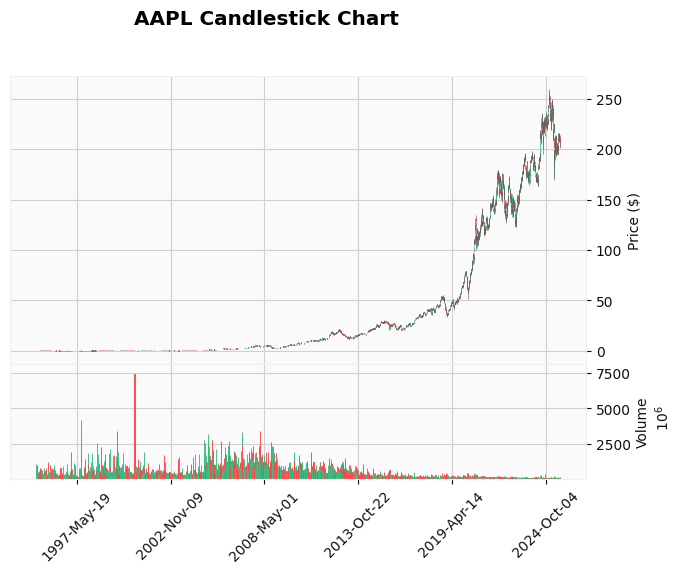

In [28]:
# ===========================================
# ✅ EDA Step 1 — Candlestick Chart for Apple
# ===========================================

import mplfinance as mpf

# Make sure the index is datetime
df.index = pd.to_datetime(df.index)

# Check the columns (optional)
print(df.columns)

# Plot candlestick chart with volume
mpf.plot(
    df,
    type='candle',         # Candlestick chart
    style='yahoo',         # Yahoo Finance style
    volume=True,           # Add volume subplot
    title='AAPL Candlestick Chart',
    ylabel='Price ($)',
    ylabel_lower='Volume',
    show_nontrading=True   # Include non-trading days as gaps
)


#Raw Price Trend

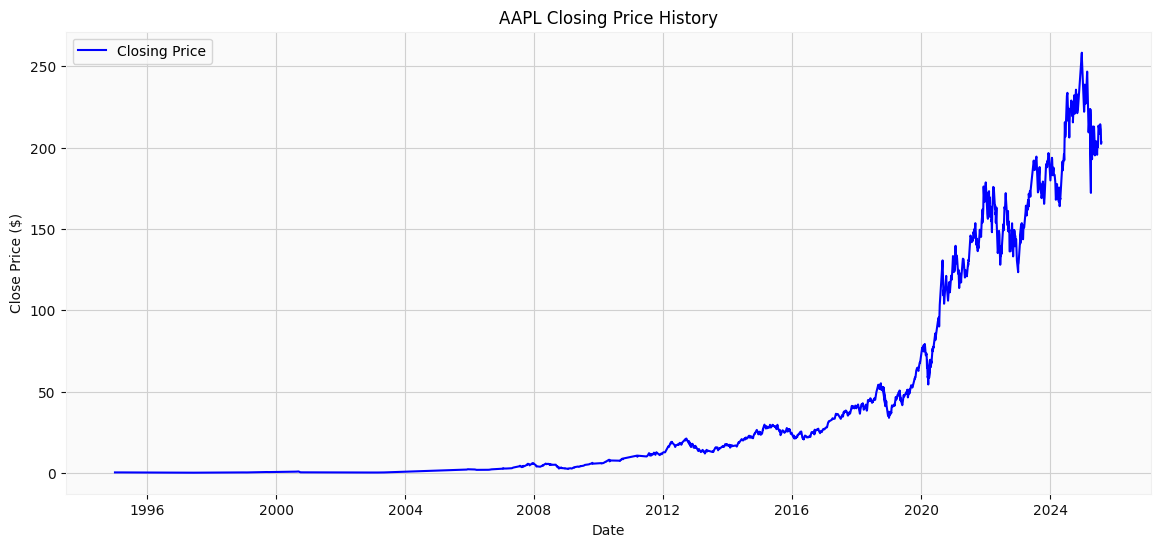

In [29]:
# ===========================================
# ✅ EDA Step 2 — Line Plot: Closing Price
# ===========================================

import matplotlib.pyplot as plt

# Make sure your index is datetime
df.index = pd.to_datetime(df.index)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')

plt.title('AAPL Closing Price History')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True)
plt.show()


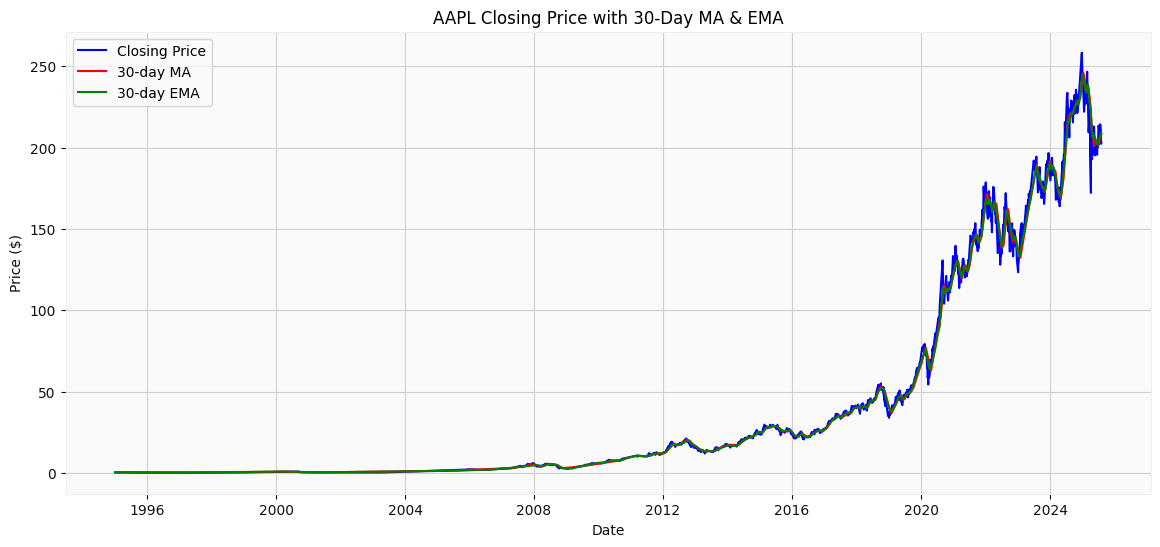

In [30]:
# ===========================================
# ✅ EDA Step 3 — Closing Price with MA & EMA
# ===========================================

import matplotlib.pyplot as plt

# Make sure your index is datetime
df.index = pd.to_datetime(df.index)

# Create 30-day Moving Average (MA) and Exponential Moving Average (EMA)
df['MA30'] = df['Close'].rolling(window=30).mean()
df['EMA30'] = df['Close'].ewm(span=30, adjust=False).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.plot(df['MA30'], label='30-day MA', color='red')
plt.plot(df['EMA30'], label='30-day EMA', color='green')

plt.title('AAPL Closing Price with 30-Day MA & EMA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


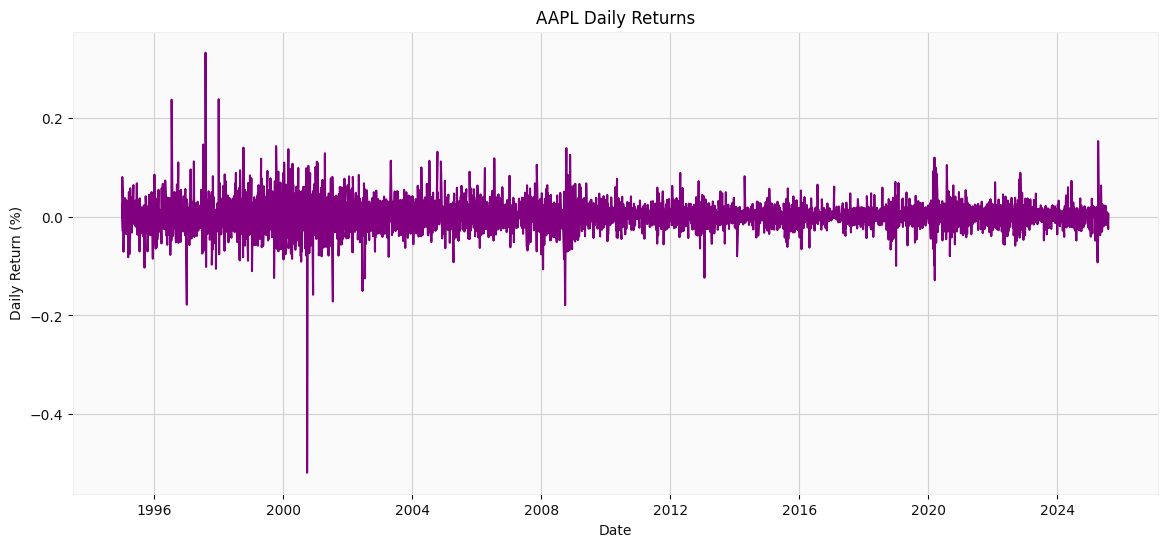

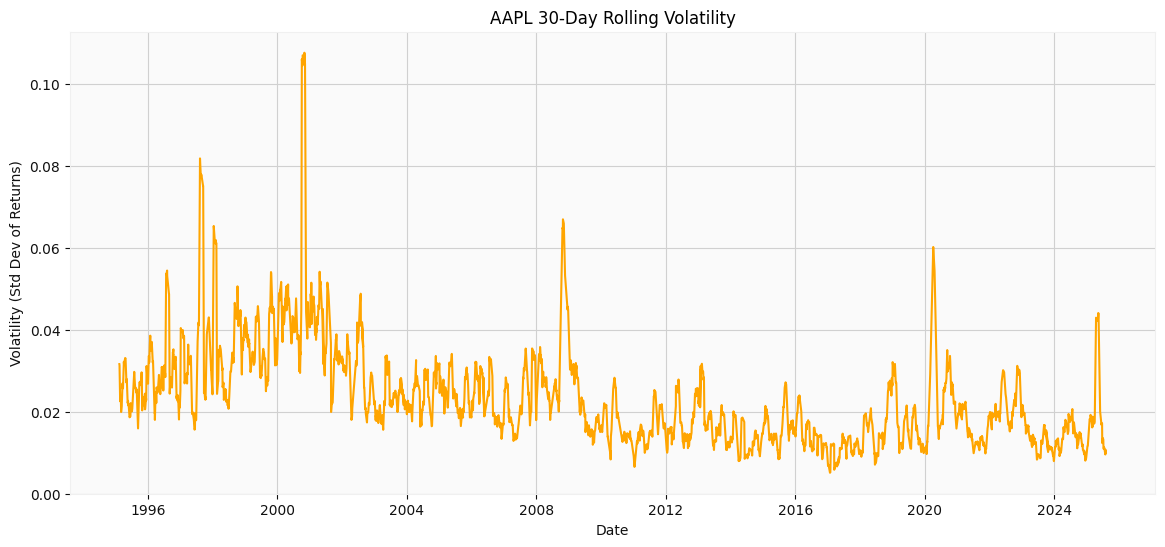

In [31]:
# ===========================================
# ✅ EDA Step 4 — Daily Returns & Volatility
# ===========================================

import matplotlib.pyplot as plt

# Make sure index is datetime
df.index = pd.to_datetime(df.index)

# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(14, 6))
plt.plot(df['Returns'], label='Daily Returns', color='purple')
plt.title('AAPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.show()

# Calculate 30-day rolling volatility (standard deviation of returns)
df['Volatility'] = df['Returns'].rolling(window=30).std()

# Plot rolling volatility
plt.figure(figsize=(14, 6))
plt.plot(df['Volatility'], label='30-Day Rolling Volatility', color='orange')
plt.title('AAPL 30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev of Returns)')
plt.grid(True)
plt.show()


<Figure size 1400x500 with 0 Axes>

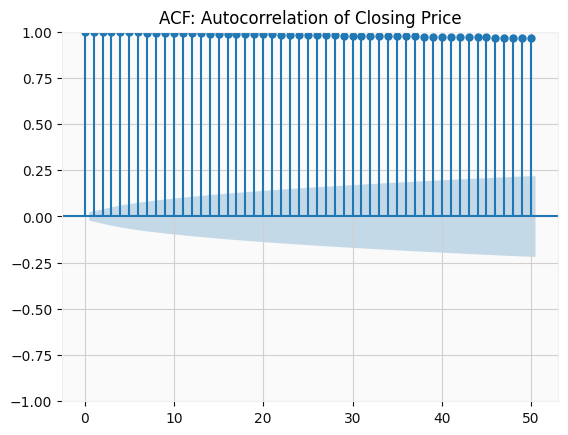

<Figure size 1400x500 with 0 Axes>

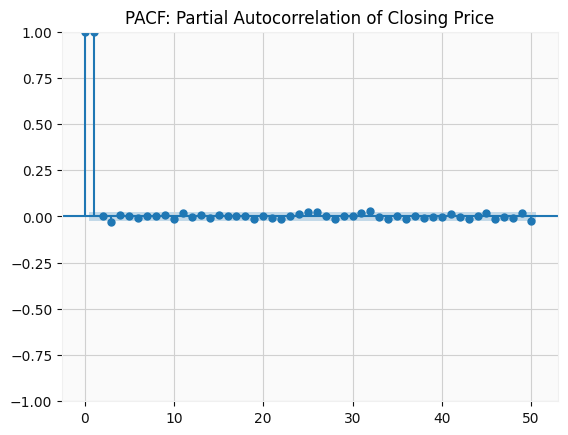

In [32]:
# ===========================================
# ✅ EDA Step 5 — ACF & PACF Plots
# ===========================================

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Drop NA just in case
close_prices = df['Close'].dropna()

# Plot ACF
plt.figure(figsize=(14, 5))
plot_acf(close_prices, lags=50)
plt.title('ACF: Autocorrelation of Closing Price')
plt.show()

# Plot PACF
plt.figure(figsize=(14, 5))
plot_pacf(close_prices, lags=50)
plt.title('PACF: Partial Autocorrelation of Closing Price')
plt.show()


#Feature Engineering

#Technical Indicator

In [33]:
import numpy as np
import pandas as pd
import ta

def add_custom_indicators(df):
    df = df.copy()

    df["lag_1"] = df["Close"].shift(1)
    df["lag_2"] = df["Close"].shift(2)

    df["momentum"] = df["Close"] - df["lag_1"]

    # EMA (Exponential Moving Average)
    df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()
    df["ema_diff"] = df["Close"] - df["EMA_10"]

    # SMA (Simple Moving Average)
    df['SMA_10'] = df['Close'].rolling(window=10).mean()
    df['SMA_20'] = df['Close'].rolling(window=20).mean()

    # RSI (Relative Strength Index)
    df["rsi"] = ta.momentum.RSIIndicator(df["Close"]).rsi()

    # MACD & MACD Histogram
    df["macd"] = ta.trend.MACD(df["Close"]).macd()

    # OBV (vectorized)
    df['OBV_in_million'] = ta.volume.OnBalanceVolumeIndicator(df['Close'], df['Volume']).on_balance_volume() / 1e6

    return df


In [34]:
df = add_custom_indicators(df)

In [35]:
df

,Close,High,Low,Open,Volume,MA30,EMA30,Returns,Volatility,lag_1,lag_2,momentum,EMA_10,EMA_50,ema_diff,SMA_10,SMA_20,rsi,macd,OBV_in_million
Date,,,,,,,,,,,,,,,,,,,,
1995-01-03,0.285078,0.288792,0.281364,0.288792,1.038688e+08,NaN,0.285078,NaN,NaN,NaN,NaN,NaN,0.285078,0.285078,0.000000,NaN,NaN,NaN,NaN,103.8688
1995-01-04,0.292507,0.294364,0.286935,0.286935,1.586816e+08,NaN,0.285557,0.026060,NaN,0.285078,NaN,0.007429,0.286429,0.285369,0.006078,NaN,NaN,NaN,NaN,262.5504
1995-01-05,0.288792,0.292507,0.287864,0.291578,7.364000e+07,NaN,0.285766,-0.012700,NaN,0.292507,0.285078,-0.003715,0.286858,0.285504,0.001934,NaN,NaN,NaN,NaN,188.9104
1995-01-06,0.312007,0.320365,0.305507,0.309221,1.076622e+09,NaN,0.287459,0.080386,NaN,0.288792,0.292507,0.023215,0.291431,0.286543,0.020576,NaN,NaN,NaN,NaN,1265.5328
1995-01-09,0.306087,0.311079,0.304578,0.309222,2.740864e+08,NaN,0.288661,-0.018973,NaN,0.312007,0.288792,-0.005920,0.294096,0.287309,0.011992,NaN,NaN,NaN,NaN,991.4464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-29,211.270004,214.809998,210.820007,214.179993,5.141170e+07,207.793667,209.256146,-0.012988,0.009680,214.050003,213.880005,-2.779999,212.385289,208.226101,-1.115284,212.534999,211.5780,54.526394,2.322245,167946.4392
2025-07-30,209.050003,212.389999,207.720001,211.899994,4.551250e+07,208.148000,209.242847,-0.010508,0.009852,211.270004,214.050003,-2.220001,211.778873,208.258411,-2.728870,212.423999,211.6395,48.624420,1.909426,167900.9267
2025-07-31,207.570007,209.839996,207.160004,208.490005,8.069840e+07,208.545667,209.134922,-0.007080,0.009545,209.050003,211.270004,-1.479996,211.013625,208.231414,-3.443618,212.178999,211.3960,45.118237,1.446170,167820.2283


In [36]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'MA30', 'EMA30', 'Returns',
       'Volatility', 'lag_1', 'lag_2', 'momentum', 'EMA_10', 'EMA_50',
       'ema_diff', 'SMA_10', 'SMA_20', 'rsi', 'macd', 'OBV_in_million'],
      dtype='object')

In [37]:
# Define your features list
features_df = [
     'High', 'Low', 'Open', 'Volume', 'MA30', 'EMA30', 'Returns',
       'Volatility', 'lag_1', 'lag_2', 'momentum', 'EMA_10', 'EMA_50',
       'ema_diff', 'SMA_10', 'SMA_20', 'rsi', 'macd', 'OBV_in_million'
]

# Drop rows with any NaN in features or target
df_clean = df[features_df + ['Close']].dropna()

print(f"✅ Shape after dropping NaNs: {df_clean.shape}")


✅ Shape after dropping NaNs: (7668, 20)


In [38]:
df_clean

,High,Low,Open,Volume,MA30,EMA30,Returns,Volatility,lag_1,lag_2,momentum,EMA_10,EMA_50,ema_diff,SMA_10,SMA_20,rsi,macd,OBV_in_million,Close
Date,,,,,,,,,,,,,,,,,,,,
1995-02-14,0.328694,0.317520,0.325901,165614400.0,0.314651,0.309866,-0.018570,0.031617,0.325901,0.325007,-0.006052,0.315550,0.305277,0.004299,0.312138,0.311649,56.795374,0.003771,2039.0720,0.319849
1995-02-15,0.324039,0.316589,0.322177,184475200.0,0.315469,0.310329,-0.008736,0.031430,0.319849,0.325901,-0.002794,0.315824,0.305739,0.001231,0.314035,0.310555,54.551385,0.003685,1854.5968,0.317055
1995-02-16,0.322177,0.317520,0.321245,218780800.0,0.316566,0.311064,0.014686,0.031351,0.317055,0.319849,0.004656,0.316894,0.306365,0.004817,0.315284,0.309601,57.560635,0.003946,2073.3776,0.321711
1995-02-17,0.320314,0.316589,0.319383,121788800.0,0.316719,0.311420,-0.015920,0.028021,0.321711,0.317055,-0.005122,0.316839,0.306766,-0.000250,0.316857,0.309598,53.374290,0.003698,1951.5888,0.316589
1995-02-21,0.318451,0.304484,0.317520,301582400.0,0.316697,0.311033,-0.035295,0.028572,0.316589,0.321711,-0.011174,0.314762,0.306713,-0.009346,0.317312,0.309175,45.584912,0.002569,1650.0064,0.305415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-29,214.809998,210.820007,214.179993,51411700.0,207.793667,209.256146,-0.012988,0.009680,214.050003,213.880005,-2.779999,212.385289,208.226101,-1.115284,212.534999,211.578000,54.526394,2.322245,167946.4392,211.270004
2025-07-30,212.389999,207.720001,211.899994,45512500.0,208.148000,209.242847,-0.010508,0.009852,211.270004,214.050003,-2.220001,211.778873,208.258411,-2.728870,212.423999,211.639500,48.624420,1.909426,167900.9267,209.050003
2025-07-31,209.839996,207.160004,208.490005,80698400.0,208.545667,209.134922,-0.007080,0.009545,209.050003,211.270004,-1.479996,211.013625,208.231414,-3.443618,212.178999,211.396000,45.118237,1.446170,167820.2283,207.570007


In [39]:
print(df_clean.isnull().sum())

High              0
Low               0
Open              0
Volume            0
MA30              0
EMA30             0
Returns           0
Volatility        0
lag_1             0
lag_2             0
momentum          0
EMA_10            0
EMA_50            0
ema_diff          0
SMA_10            0
SMA_20            0
rsi               0
macd              0
OBV_in_million    0
Close             0
dtype: int64


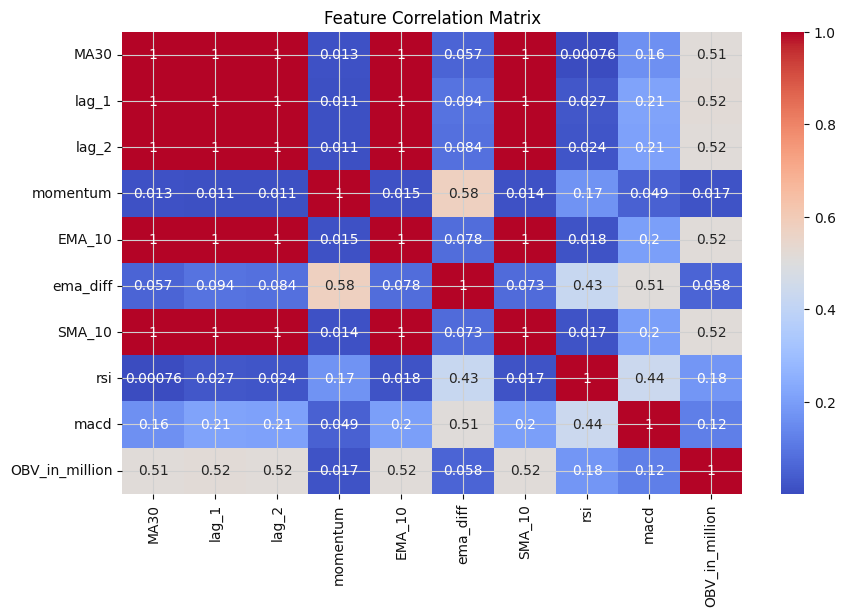

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['MA30','lag_1', 'lag_2', 'momentum', 'EMA_10', 'ema_diff','SMA_10', 'rsi', 'macd', 'OBV_in_million']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

100%|===================| 7668/7669 [05:30<00:00]       

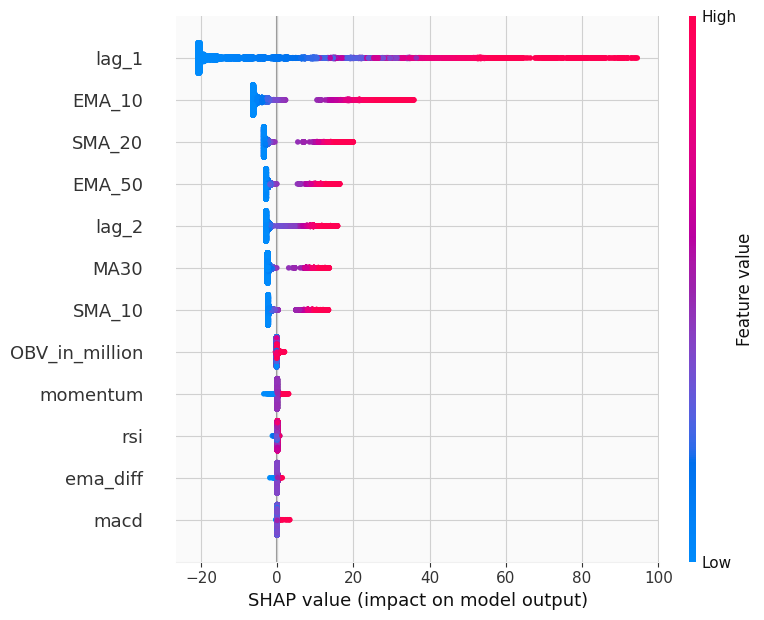

In [41]:
# Example: fit RandomForest and apply SHAP
import shap
from sklearn.ensemble import RandomForestRegressor

X = df[['MA30','lag_1','SMA_20','lag_2','EMA_50','momentum', 'EMA_10', 'ema_diff','SMA_10', 'rsi', 'macd', 'OBV_in_million']].dropna()
y = df['Close'].loc[X.index]

model = RandomForestRegressor()
model.fit(X, y)

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.summary_plot(shap_values, X)


#Linear regression

In [42]:
# === Step 1: Feature Selection ===
features = ['Close', 'EMA_10', 'momentum', 'lag_1']
selected_data = df_clean[features]  # No transformation yet

In [43]:
# === Scaling and preparing data ===
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)
scaled_df = pd.DataFrame(scaled_data, columns=features, index=selected_data.index)

In [44]:
# === Step 2: Supervised Data Creation (Lookback Window) ===
def create_linear_features(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        # Flatten 60-day window into 1D array for linear regression
        window = data[i - seq_len:i].flatten()
        X.append(window)
        y.append(data[i, 0])  # Target is the scaled 'Close' price
    return np.array(X), np.array(y)

lookback = 60
X, y = create_linear_features(scaled_data, seq_len=lookback)


In [45]:
# === Step 3: Train-Test Split (70/30) ===
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [46]:
# === Step 4: Train Linear Regression Model ===
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
# === Step 5: Predict on Test Data ===
y_pred_scaled = lin_reg.predict(X_test)

In [48]:
# === Step 6: Inverse Scaling to Get Predictions in Original Price ===
num_extra_features = len(features) - 1

# Pad with zeros to match original feature count before inverse_transform
y_pred_full = np.concatenate(
    [y_pred_scaled.reshape(-1, 1), np.zeros((len(y_pred_scaled), num_extra_features))], axis=1)
y_test_full = np.concatenate(
    [y_test.reshape(-1, 1), np.zeros((len(y_test), num_extra_features))], axis=1)

# Inverse transform to get actual price values
y_pred_unscaled = scaler.inverse_transform(y_pred_full)[:, 0]
y_test_unscaled = scaler.inverse_transform(y_test_full)[:, 0]

In [49]:
# === Step 7: Evaluate Model Performance ===
mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
rmse = np.sqrt(mse)
print("\n📊 Linear Regression Evaluation:")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")


📊 Linear Regression Evaluation:
MSE  : 5.80
RMSE : 2.41


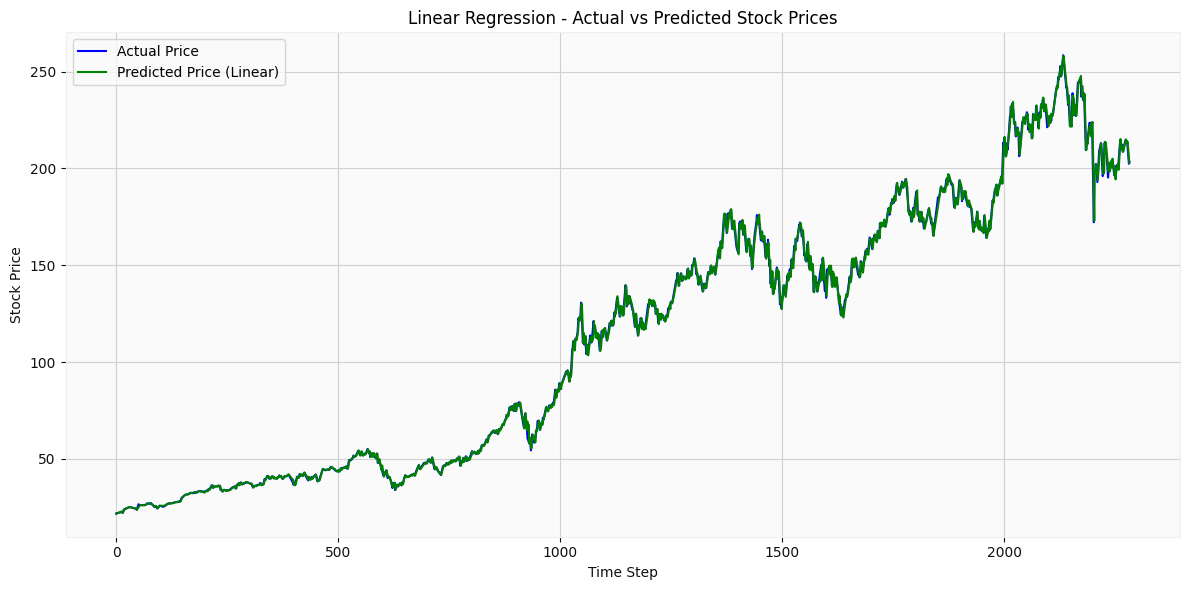

In [50]:
# === Step 8: Plot Actual vs Predicted Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Actual Price', color='blue')
plt.plot(y_pred_unscaled, label='Predicted Price (Linear)', color='green')
plt.title("Linear Regression - Actual vs Predicted Stock Prices")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Predict Next 10 Days Using Recursive Forecasting

In [51]:
# === Your existing feature list ===
features_list = ['Close', 'EMA_10', 'momentum', 'lag_1']

In [52]:
# === Scaling and preparing data ===
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_clean[features])

In [53]:
# === Create direct multi-output features ===
def create_multistep_features(data, lookback=60, forecast_horizon=10):
    X, y = [], []
    for i in range(lookback, len(data) - forecast_horizon + 1):
        window = data[i - lookback:i].flatten()
        future = data[i:i + forecast_horizon, 0]  # Predict 'Close' for next 10 days
        X.append(window)
        y.append(future)
    return np.array(X), np.array(y)

lookback = 60
horizon = 10
X, y = create_multistep_features(scaled_data, lookback=lookback, forecast_horizon=horizon)

In [54]:
# === Train-test split ===
train_size = int(len(X) * 0.7)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [55]:
# === Train Multi-output Linear Regression ===
multi_output_model = LinearRegression()
multi_output_model.fit(X_train, y_train)

LinearRegression()

In [56]:
# === Predict the last available window ===
latest_input = scaled_data[-lookback:].flatten().reshape(1, -1)
forecast_scaled = multi_output_model.predict(latest_input)[0]


In [57]:
# === Inverse transform ===
def inverse_forecast(pred_scaled, scaler, num_features):
    padded = np.concatenate([pred_scaled.reshape(-1,1),
                             np.zeros((len(pred_scaled), num_features - 1))], axis=1)
    return scaler.inverse_transform(padded)[:, 0]

forecast_unscaled = inverse_forecast(forecast_scaled, scaler, num_features=len(features))

In [58]:
# === Future dates ===
last_date = df_clean.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=horizon)

# === Forecast DataFrame ===
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': forecast_unscaled
}).set_index('Date')

In [59]:
# === Plot ===
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_clean.index[-100:], y=df_clean['Close'].tail(100),
                         mode='lines+markers', name='Historical Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df['Predicted_Close'],
                         mode='lines+markers', name='Forecast (Next 10 Days)', line=dict(color='orange', dash='dot')))

fig.update_layout(title="📈 10-Day Stock Price Forecast (Linear Regression - Direct)",
                  xaxis_title="Date", yaxis_title="Stock Price ($)",
                  xaxis_rangeslider_visible=True)
fig.show()

# === Print forecast ===
print("\n Forecasted Close Prices for Next 10 Days (Direct Prediction):\n")
print(forecast_df)


 Forecasted Close Prices for Next 10 Days (Direct Prediction):

            Predicted_Close
Date                       
2025-08-05       204.226085
2025-08-06       205.828327
2025-08-07       205.553174
2025-08-08       205.435164
2025-08-09       204.401798
2025-08-10       204.489661
2025-08-11       204.373536
2025-08-12       204.592006
2025-08-13       203.081354
2025-08-14       203.555985


#LSTM Model Architeture

In [60]:
# === Select features ===
selected_features = ['Close', 'EMA_10', 'momentum', 'lag_1']

In [61]:
# === Scaling and preparing data ===
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_clean[selected_features])

In [62]:
# === Sequence generation ===
def create_sequences(data, lookback=60):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i])
        y.append(data[i, 0])  # 'Close' is target (index 0)
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, lookback=60)

In [63]:
# === Train/test split ===
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [64]:
# === LSTM Model ===
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(100, return_sequences=False),
    Dropout(0.3),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [65]:
# === Early stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# === Train model ===
history = model.fit( X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early_stop],verbose=1)

Epoch 1/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 18s 102ms/step - loss: 5.2619e-04 - val_loss: 1.5110e-05
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - loss: 1.9148e-05 - val_loss: 1.1271e-05
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - loss: 1.4188e-05 - val_loss: 1.3533e-05
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - loss: 9.2801e-06 - val_loss: 1.9214e-05
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - loss: 7.6069e-06 - val_loss: 1.0081e-05
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - loss: 6.3076e-06 - val_loss: 1.8101e-05
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - loss: 5.9276e-06 - val_loss: 1.3885e-05
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - loss: 6.1511e-06 - val_loss: 2.5551e-05
Epoch 9/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - loss: 5.7601e-06 - val_loss: 1.5384e-05
Epoch 10/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - loss: 3.9570e-06 - val_loss: 9.9118e-06
Epoch 11/100
134/134 ━━━━━━━

In [66]:
# === Predict on test data ===
predicted = model.predict(X_test)

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


In [67]:
# === Inverse transform predictions ===
extra_features = len(selected_features) - 1
predicted_padded = np.concatenate([predicted, np.zeros((len(predicted), extra_features))], axis=1)
y_test_padded = np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), extra_features))], axis=1)

predicted_prices = scaler.inverse_transform(predicted_padded)[:, 0]
actual_prices = scaler.inverse_transform(y_test_padded)[:, 0]

In [68]:
# === Evaluation metrics ===
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices, predicted_prices)

print("\n📊 LSTM Model Evaluation on Test Set (Real Price Scale)")
print(f"MAE   (Mean Absolute Error):     {mae:.2f}")
print(f"MSE   (Mean Squared Error):      {mse:.2f}")
print(f"RMSE  (Root Mean Squared Error): {rmse:.2f}")


📊 LSTM Model Evaluation on Test Set (Real Price Scale)
MAE   (Mean Absolute Error):     4.12
MSE   (Mean Squared Error):      38.05
RMSE  (Root Mean Squared Error): 6.17


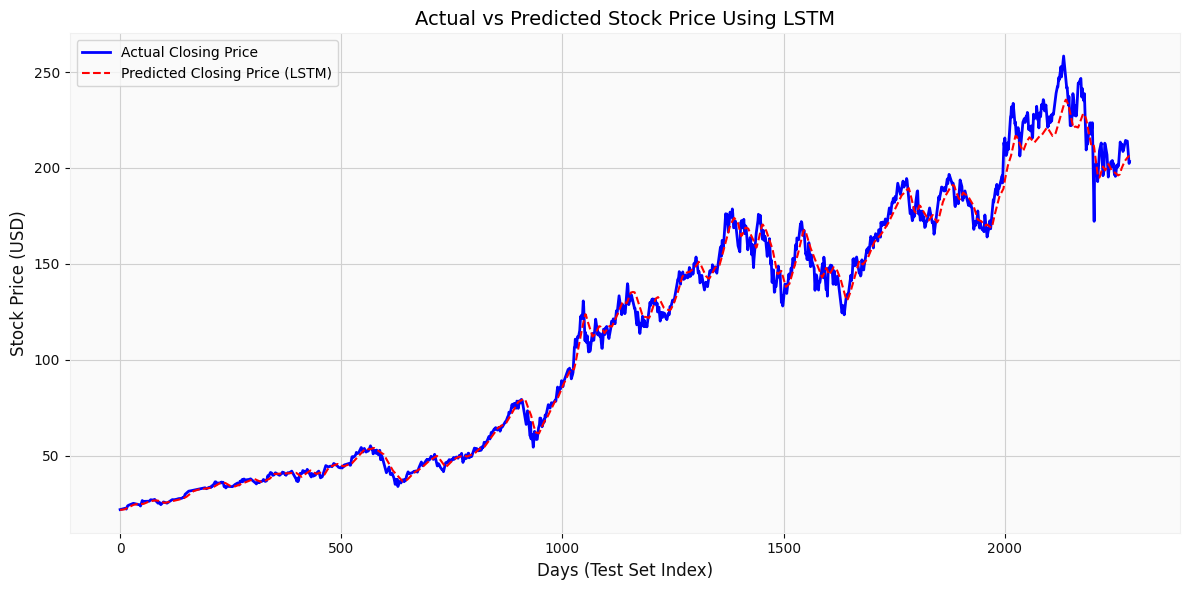

In [69]:
# === Plot: Actual vs Predicted ===
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Closing Price', color='blue', linewidth=2)
plt.plot(predicted_prices, label='Predicted Closing Price (LSTM)', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Price Using LSTM', fontsize=14)
plt.xlabel('Days (Test Set Index)', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Predict Next 10 Days Using Recursive Forecasting

In [70]:
# === Step 1: Define Selected Features ===
n_features = ['Close', 'EMA_10', 'momentum', 'lag_1']

In [71]:
# === Step 2: Feature Scaling ===
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_clean[n_features])  # scale only selected features

In [72]:
# === Step 3: Forecasting Function Using Recursive LSTM ===
def forecast_future_lstm(model, recent_scaled_data, scaler, lookback=60, forecast_days=10, num_features=4):
    """
    Recursively forecast next N days using trained LSTM model.
    """
    future_predictions = []
    current_sequence = recent_scaled_data[-lookback:].copy()

    for _ in range(forecast_days):
        # Reshape to match LSTM input shape: (1, timesteps, features)
        input_seq = current_sequence.reshape(1, lookback, num_features)

        # Predict next day's scaled 'Close' value
        next_scaled = model.predict(input_seq, verbose=0)[0][0]

        # Create next row (scaled) with dummy values for non-target features
        next_row = np.zeros(num_features)
        next_row[0] = next_scaled                                      # predicted 'Close'
        next_row[2] = next_row[0] - current_sequence[-1][0]            # momentum = current - prev close
        next_row[3] = current_sequence[-1][0]                          # lag_1 = previous close
        next_row[1] = current_sequence[-1][1]                          # optional: carry EMA_10 forward

        # Update current sequence
        current_sequence = np.vstack([current_sequence[1:], next_row])
        future_predictions.append(next_row)

    # Convert forecasted data to original price scale
    future_scaled = np.array(future_predictions)
    future_unscaled = scaler.inverse_transform(future_scaled)[:, 0]   # Only inverse 'Close' column

    return future_unscaled

In [73]:
# === Step 4: Run LSTM Forecasting ===
forecast_10_days = forecast_future_lstm(
    model=model,                           # your trained LSTM model
    recent_scaled_data=scaled_data,        # full scaled dataset
    scaler=scaler,                         # scaler used during training
    lookback=60,                           # same lookback as used in training
    forecast_days=10,                      # how many days to predict
    num_features=len(n_features)    # number of input features
)

In [74]:
# === Step 5: Create DataFrame with Future Dates ===
last_date = df_clean.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=10)

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': forecast_10_days
}).set_index('Date')

In [75]:
# === Step 6: Plot Using Plotly Interactive Chart ===
fig = go.Figure()

# Plot last 100 actual values
fig.add_trace(go.Scatter(x=df_clean.index[-100:], y=df_clean['Close'].tail(100),
                         mode='lines+markers', name='Historical Close', line=dict(color='blue')))

# Plot 10-day forecast
fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df['Predicted_Close'],
                         mode='lines+markers', name='Forecast (Next 10 Days)', line=dict(color='orange', dash='dot')))

fig.update_layout(
    title=" 10-Day Stock Price Forecast Using LSTM (Recursive)",
    xaxis_title="Date",
    yaxis_title="Stock Price (USD)",
    xaxis_rangeslider_visible=True,
    template='plotly_white'
)

fig.show()

# === Step 7: Print Forecast Values ===
print("\n Forecasted Close Prices for Next 10 Days:\n")
print(forecast_df)


 Forecasted Close Prices for Next 10 Days:

            Predicted_Close
Date                       
2025-08-05       205.491347
2025-08-06       205.475889
2025-08-07       205.586077
2025-08-08       205.727858
2025-08-09       205.868730
2025-08-10       205.998347
2025-08-11       206.115433
2025-08-12       206.221187
2025-08-13       206.317334
2025-08-14       206.405106


#Hyperparameter tunning

In [86]:
def build_model(hp):
    model = Sequential()

    # Tune number of LSTM units (64–256)
    model.add(LSTM(units=hp.Int('lstm_units_1', min_value=64, max_value=256, step=32),
                   return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2])))

    # Tune dropout (0.1–0.5)
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(LSTM(units=hp.Int('lstm_units_2', min_value=32, max_value=128, step=32),
                   return_sequences=False))

    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1))

    # Tune learning rate (1e-4 to 1e-2)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error'
    )

    return model


In [87]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # You can increase for more thorough search
    executions_per_trial=1,
    overwrite=True,
    directory='lstm_tuner',
    project_name='stock_forecast'
)


In [88]:
tuner.search(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
    verbose=1
)


Trial 5 Complete [00h 04m 17s]
val_loss: 1.034245542541612e-05

Best val_loss So Far: 9.029473403643351e-06
Total elapsed time: 00h 34m 07s


In [89]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
print(f"LSTM units 1: {best_hps.get('lstm_units_1')}")
print(f"Dropout 1: {best_hps.get('dropout_1')}")
print(f"LSTM units 2: {best_hps.get('lstm_units_2')}")
print(f"Dropout 2: {best_hps.get('dropout_2')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")


Best hyperparameters:
LSTM units 1: 160
Dropout 1: 0.2
LSTM units 2: 96
Dropout 2: 0.4
Learning Rate: 0.01


In [90]:
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
    verbose=1
)


Epoch 1/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 28s 179ms/step - loss: 0.0145 - val_loss: 1.0636e-05
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 173ms/step - loss: 3.4677e-05 - val_loss: 1.6169e-05
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 182ms/step - loss: 2.2520e-05 - val_loss: 8.8626e-06
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 176ms/step - loss: 1.7035e-05 - val_loss: 9.9008e-06
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 178ms/step - loss: 1.5760e-05 - val_loss: 8.0942e-06
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 40s 176ms/step - loss: 1.0623e-05 - val_loss: 5.1803e-05
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - loss: 1.0147e-05 - val_loss: 9.0631e-06
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 183ms/step - loss: 8.1136e-06 - val_loss: 1.0159e-05
Epoch 9/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 175ms/step - loss: 7.6483e-06 - val_loss: 7.6656e-06
Epoch 10/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 168ms/step - loss: 6.0057e-06 - val_loss: 1.1449e-05
Epoch 11/100
134/134 ━━

In [91]:
# === Predict scaled values using best model ===
y_pred_scaled = best_model.predict(X_test)

# === Reconstruct full feature set for inverse transform ===
n_features = X_train.shape[2]

y_pred_full = np.zeros((len(y_pred_scaled), n_features))
y_pred_full[:, 0] = y_pred_scaled[:, 0]  # Only 'Close' is predicted

y_test_full = np.zeros((len(y_test), n_features))
y_test_full[:, 0] = y_test

# === Inverse scale back to original prices ===
y_pred_inverse = scaler.inverse_transform(y_pred_full)[:, 0]
y_test_inverse = scaler.inverse_transform(y_test_full)[:, 0]

# === Evaluation metrics ===
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

print("\n📊 Best LSTM Model Evaluation (Real Scale)")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")


72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step

📊 Best LSTM Model Evaluation (Real Scale)
MAE  : 4.96
MSE  : 48.65
RMSE : 6.97
R²   : 0.99


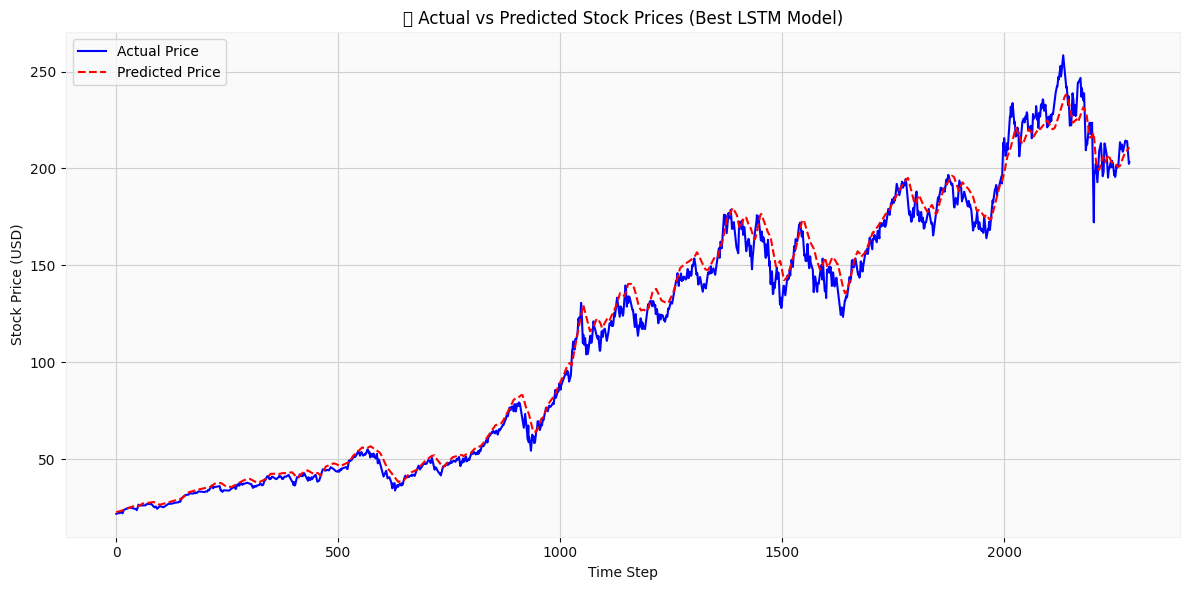

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual Price', color='blue')
plt.plot(y_pred_inverse, label='Predicted Price', color='red', linestyle='--')
plt.title('📈 Actual vs Predicted Stock Prices (Best LSTM Model)')
plt.xlabel('Time Step')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Stacking Ensemble

#Decision Tree

In [93]:
# Trim to the shortest length to avoid misalignment
min_len = min(len(y_pred_unscaled), len(y_pred_inverse), len(y_test_unscaled))

# Ensure aligned
y_pred_unscaled = y_pred_unscaled[:min_len]
y_pred_inverse = y_pred_inverse[:min_len]
y_test_unscaled = y_test_unscaled[:min_len]


In [94]:
# 1. Prepare input features for meta-model
stacked_inputs = np.column_stack((y_pred_unscaled, y_pred_inverse))

# 2. Use true values as targets (ensure same shape)
# You can use y_test_unscaled or y_test_inverse — both should be identical
stacked_target = y_test_unscaled  # or y_test_inverse

# 3. Train meta-learner (Decision Tree)
meta_model = DecisionTreeRegressor(max_depth=5, random_state=42)
meta_model.fit(stacked_inputs, stacked_target)

# 4. Predict final output using ensemble
final_predictions = meta_model.predict(stacked_inputs)

# 5. Evaluate the stacked model
mae = mean_absolute_error(stacked_target, final_predictions)
mse = mean_squared_error(stacked_target, final_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(stacked_target, final_predictions)

print("\n📊 Stacking Ensemble Evaluation (Decision Tree on LR + LSTM)")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")



📊 Stacking Ensemble Evaluation (Decision Tree on LR + LSTM)
MAE  : 2.04
MSE  : 8.53
RMSE : 2.92
R²   : 1.00


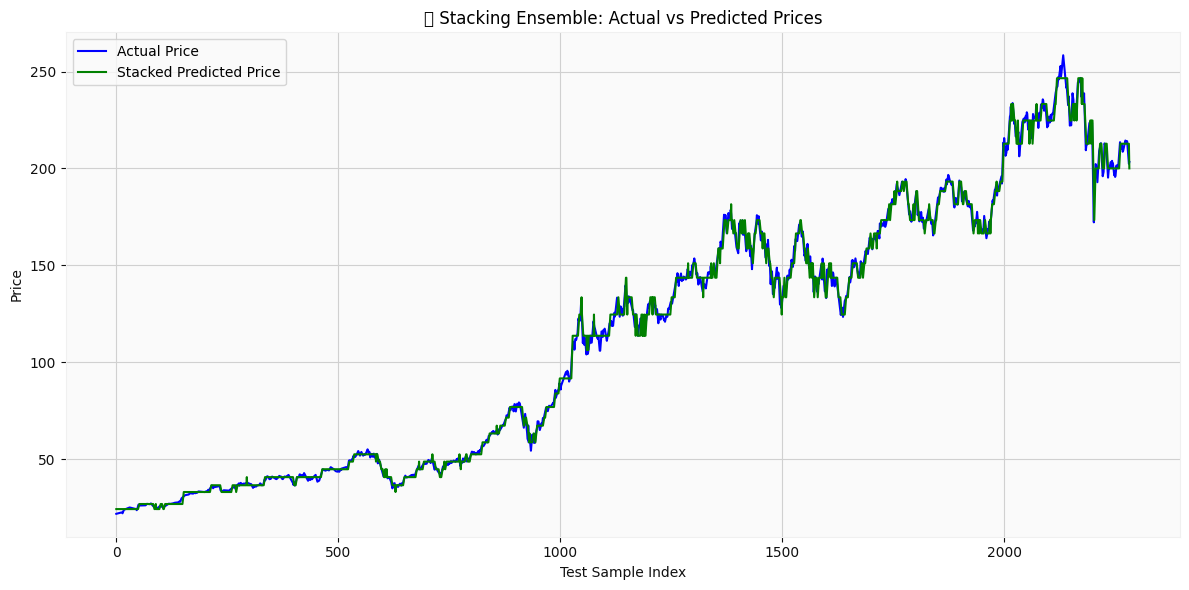

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(stacked_target, label='Actual Price', color='blue')
plt.plot(final_predictions, label='Stacked Predicted Price', color='green')
plt.title("📈 Stacking Ensemble: Actual vs Predicted Prices")
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Predict Future 10 days

In [96]:
def forecast_10_days_stacking(df_clean, lin_reg, lstm_model, scaler, stacked_model, features, lookback=60, horizon=10):
    df_recent = df_clean[features].copy()
    scaled_recent = scaler.transform(df_recent)

    # Prepare latest 60-step input for recursive forecasting
    current_window = scaled_recent[-lookback:].copy()

    lstm_forecast = []
    linreg_forecast = []
    final_forecast = []

    for _ in range(horizon):
        # === 1. LSTM prediction ===
        lstm_input = current_window.reshape(1, lookback, len(features))
        lstm_scaled_pred = lstm_model.predict(lstm_input)
        lstm_pred_full = np.zeros((1, len(features)))
        lstm_pred_full[0, 0] = lstm_scaled_pred  # Only predicting Close
        lstm_close_pred = scaler.inverse_transform(lstm_pred_full)[0, 0]

        # === 2. Linear Regression prediction ===
        lin_input = current_window.reshape(1, -1)
        lin_scaled_pred = lin_reg.predict(lin_input)
        lin_pred_full = np.zeros((1, len(features)))
        lin_pred_full[0, 0] = lin_scaled_pred
        lin_close_pred = scaler.inverse_transform(lin_pred_full)[0, 0]

        # === 3. Combine predictions and feed into stacked model ===
        meta_input = np.array([[lin_close_pred, lstm_close_pred]])
        stacked_pred = stacked_model.predict(meta_input)[0]

        # === Store all predictions ===
        linreg_forecast.append(lin_close_pred)
        lstm_forecast.append(lstm_close_pred)
        final_forecast.append(stacked_pred)

        # === 4. Prepare next input by appending the new prediction (scaled) ===
        next_scaled_close = scaler.transform([[stacked_pred]*len(features)])[0]
        current_window = np.vstack([current_window[1:], next_scaled_close])

    # Generate forecast dates
    start_date = df_clean.index[-1] + pd.Timedelta(days=1)
    forecast_dates = pd.date_range(start=start_date, periods=horizon)

    forecast_df = pd.DataFrame({
        'Date': forecast_dates,
        'Linear_Regression': linreg_forecast,
        'LSTM': lstm_forecast,
        'Stacked_Prediction': final_forecast
    }).set_index('Date')

    return forecast_df


In [97]:
from sklearn.tree import DecisionTreeRegressor

# === Stack inputs (Linear + LSTM) ===
stacked_inputs = np.column_stack((y_pred_unscaled, y_pred_inverse))  # shape: (n_samples, 2)
stacked_target = y_test_unscaled  # true 'Close' prices

# === Train a Decision Tree on top of both model outputs ===
stacked_model = DecisionTreeRegressor(max_depth=5, random_state=42)
stacked_model.fit(stacked_inputs, stacked_target)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [98]:
forecast_10 = forecast_10_days_stacking(
    df_clean=df_clean,
    lin_reg=lin_reg,
    lstm_model=best_model,
    scaler=scaler,
    stacked_model=stacked_model,
    features=['Close', 'EMA_10', 'momentum', 'lag_1'],
    lookback=60,
    horizon=10
)

print(forecast_10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
            Linear_Regression        LSTM  Stacked_Prediction
Date                                                         
2025-08-05         204.262543  210.314712          200.035781
2025-08-06         380.358272  191.583723          246.560274
2025-08-07         561.206525  170.177075          246.560274
2025-08-08         701.225589  153.288415          246.560274
2025-08-09         812.531056  140.937250          246.560274
2025-08-10         894.134122  131.953296          246.560274
2025-08-11         956.655212  125.288249          246.560274
2025-08-12        1008.535846  120.315498          246.560274


In [99]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_clean.index[-100:], y=df_clean['Close'].tail(100), mode='lines', name='Recent Close'))
fig.add_trace(go.Scatter(x=forecast_10.index, y=forecast_10['Stacked_Prediction'], mode='lines+markers', name='10-Day Forecast'))

fig.update_layout(title='📊 Stacked Model 10-Day Forecast',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=True)
fig.show()


#XGBOOST

In [100]:
# These are your model predictions:
linear_preds = y_pred_unscaled    # From Linear Regression
lstm_preds = y_pred_inverse       # From LSTM
true_values = y_test_unscaled     # Ground truth

In [103]:
# Stack base model predictions as features
stacked_features = np.column_stack((linear_preds, lstm_preds))

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(stacked_features, true_values)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [104]:
ensemble_preds = xgb_model.predict(stacked_features)

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(true_values, ensemble_preds)
mse = mean_squared_error(true_values, ensemble_preds)
rmse = np.sqrt(mse)
r2 = r2_score(true_values, ensemble_preds)

print("\n📊 Stacking Ensemble (XGBoost) Evaluation:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")


📊 Stacking Ensemble (XGBoost) Evaluation:
MAE  : 1.43
MSE  : 4.82
RMSE : 2.20


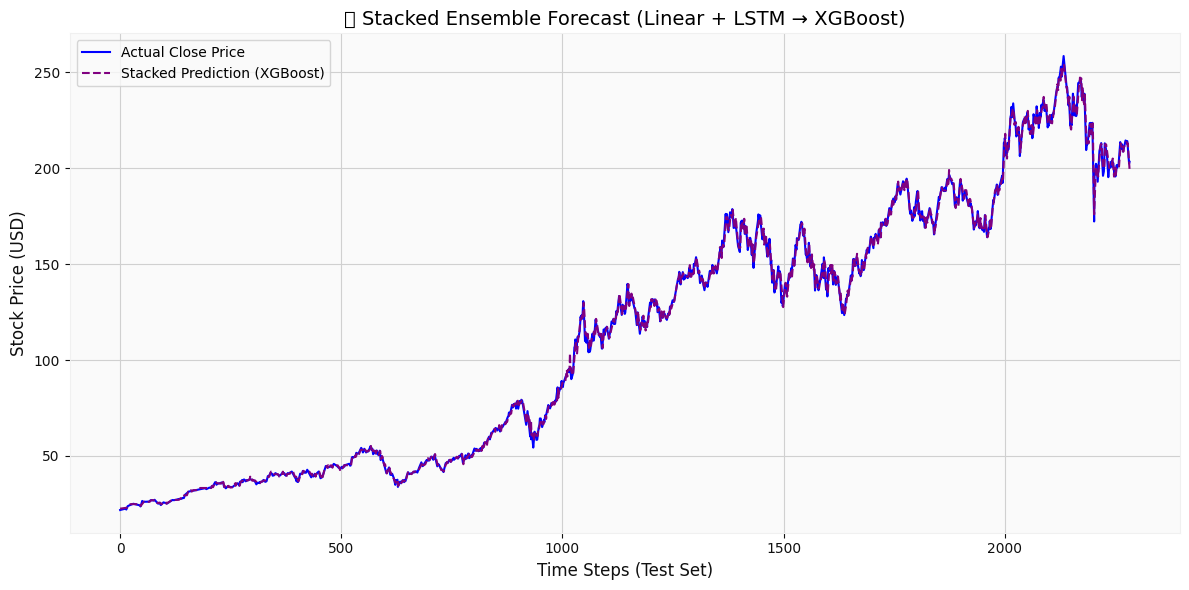

In [106]:
# === Step 5: Plot Actual vs Ensemble Prediction ===
plt.figure(figsize=(12, 6))
plt.plot(true_values, label='Actual Close Price', color='blue')
plt.plot(ensemble_preds, label='Stacked Prediction (XGBoost)', color='purple', linestyle='--')
plt.title("📉 Stacked Ensemble Forecast (Linear + LSTM → XGBoost)", fontsize=14)
plt.xlabel("Time Steps (Test Set)", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()